# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [15]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [26]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train[1].shape

(28, 28)

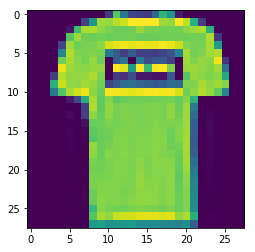

In [29]:
plt.imshow(x_train[1])

In [34]:
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [35]:
x_train.max()

255

In [36]:
x_train = x_train/255

In [39]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [40]:
x_train.shape

(60000, 28, 28)

In [44]:
x_train = x_train.reshape(60000, 28, 28,1)

In [46]:
x_test.shape

(10000, 28, 28)

In [47]:
x_test = x_test.reshape(10000, 28, 28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [49]:
from keras.utils.np_utils import to_categorical


In [51]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [52]:
y_category_train = to_categorical(y_train)

In [53]:
y_category_test = to_categorical(y_test)

In [55]:
y_category_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D


In [63]:

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [67]:
model.fit(x_train,
          y_category_train,
          epochs=10,
          )

Epoch 1/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0704 - acc: 0.9726
Epoch 2/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0500 - acc: 0.9805
Epoch 3/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0437 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0393 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.0358 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0330 - acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0306 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0284 - acc: 0.9897
Epoch 9/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0268 - acc: 0.9902
Epoch 10/10
60000/60000 [==============================] - 16s 263us/step - loss: 

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [69]:
model.metrics_names

['loss', 'acc']

In [70]:
model.evaluate(x_test,y_category_test)

10000/10000 [==============================] - 1s 77us/step


[0.05364618001282215, 0.9813500144958496]

In [71]:
from sklearn.metrics import classification_report

In [72]:
predictions = model.predict_classes(x_test)

In [73]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85      1000
          1       0.98      0.98      0.98      1000
          2       0.80      0.91      0.85      1000
          3       0.93      0.90      0.91      1000
          4       0.87      0.82      0.84      1000
          5       0.99      0.95      0.97      1000
          6       0.74      0.74      0.74      1000
          7       0.95      0.95      0.95      1000
          8       0.99      0.97      0.98      1000
          9       0.94      0.97      0.95      1000

avg / total       0.91      0.90      0.90     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!